In [6]:
import numpy as np
import pandas as pd
import pickle

# Lcentred = pickle.load(open("Ktest_centred.pkl", "rb"))
# Lrotated = pickle.load(open("Ktest_rot.pkl", "rb"))


connecvity = np.genfromtxt('connectivity.csv')
connecvityN = connecvity - 1
connecvityN = connecvityN.astype(int)
numberOfCell = connecvityN.shape
lv =pd.read_pickle('lv_geo_without_check.pkl')
#%%
pointData=lv[68,:]
# pointData = np.genfromtxt('./mesh_centered/HV02.csv', delimiter=',')
#%%
def move_mesh(pointData):
    z_coors = []
    x_coors = []
    y_coors = []
    for i in range(0, 60):
        z_coors.append(pointData[i*3+2])
        y_coors.append(pointData[i*3+1])
        x_coors.append(pointData[i*3+0])
    
    z_average = np.average(z_coors)
    y_average = np.average(y_coors)
    x_average = np.average(x_coors)
    
    # move the mesh 
    NoOfPoints = int(len(pointData)/3)
    pointDataMoved = []
    for i in range(0, NoOfPoints):
        pointDataMoved.append(pointData[i*3+0] - x_average)
        pointDataMoved.append(pointData[i*3+1] - y_average)
        pointDataMoved.append(pointData[i*3+2] - z_average)
    
    
    translated_centre=[x_average, y_average, z_average]
    
    return pointDataMoved, translated_centre
    




def write_vtk(pointData, connecvityN, vtkfileName):
    
    fid = open(vtkfileName, "w")
    
    NofPoints = len(pointData)/3
    Ntotal = len(pointData)
    numberOfCell = connecvityN.shape
    
    fid.write('<?xml version="1.0"?>\n')
    fid.write('<VTKFile type=\"UnstructuredGrid" version=\"0.1">\n')
    fid.write('<UnstructuredGrid>\n')
    fid.write('<Piece NumberOfPoints=\"     %d\" NumberOfCells=\"      %d\">\n' %( NofPoints, numberOfCell[0]))
    #fid.write()
    
    fid.write('<Points>\n')
    fid.write('<DataArray type=\"Float64\" Name=\"nodes\" NumberOfComponents=\" 3\" format=\"ascii\">\n')
    for i in range(0, Ntotal):
        fid.write('%f    ' % pointData[i])
    fid.write(' </DataArray>\n')
    fid.write('</Points>\n')
    
    # now is the connecivity 
    fid.write('<Cells>\n')
    fid.write('<DataArray type=\"Int32\" Name=\"connectivity\" NumberOfComponents=\" 1\" format=\"ascii\">\n')
    for i in range(0, numberOfCell[0]):
        for j in range(0, numberOfCell[1]):
            fid.write('%d    ' % connecvityN[i][j])
    fid.write(' </DataArray>\n')
    
    #the offset into the connectivity array for the end of each cell
    fid.write('<DataArray type=\"Int32\" Name=\"offsets\" NumberOfComponents=\" 1\" format=\"ascii\">\n')
    for i in range(0,numberOfCell[0]):
        fid.write('%d    ' % ( (i+1)*8 ))
    fid.write(' </DataArray>\n')
    
    fid.write('<DataArray type=\"UInt8\" Name=\"types\" NumberOfComponents=\" 1\" format=\"ascii\">\n')
    for i in range(0, numberOfCell[0]):
        fid.write('12    ')
    fid.write(' </DataArray>\n')
    
    fid.write('</Cells>\n')
    
    
    fid.write('</Piece>\n')
    fid.write('</UnstructuredGrid> </VTKFile>\n')
    fid.close()
    #%%
write_vtk(pointData, connecvityN,'New_68.vtu' )

C:\Users\Yuzhang Ge\anaconda3\envs\newenv\lib\site-packages\pyvista\jupyter\notebook.py:60: UserWarning: Failed to use notebook backend: 

Please install `ipyvtklink` to use this feature: https://github.com/Kitware/ipyvtklink

Falling back to a static output.
  warnings.warn(


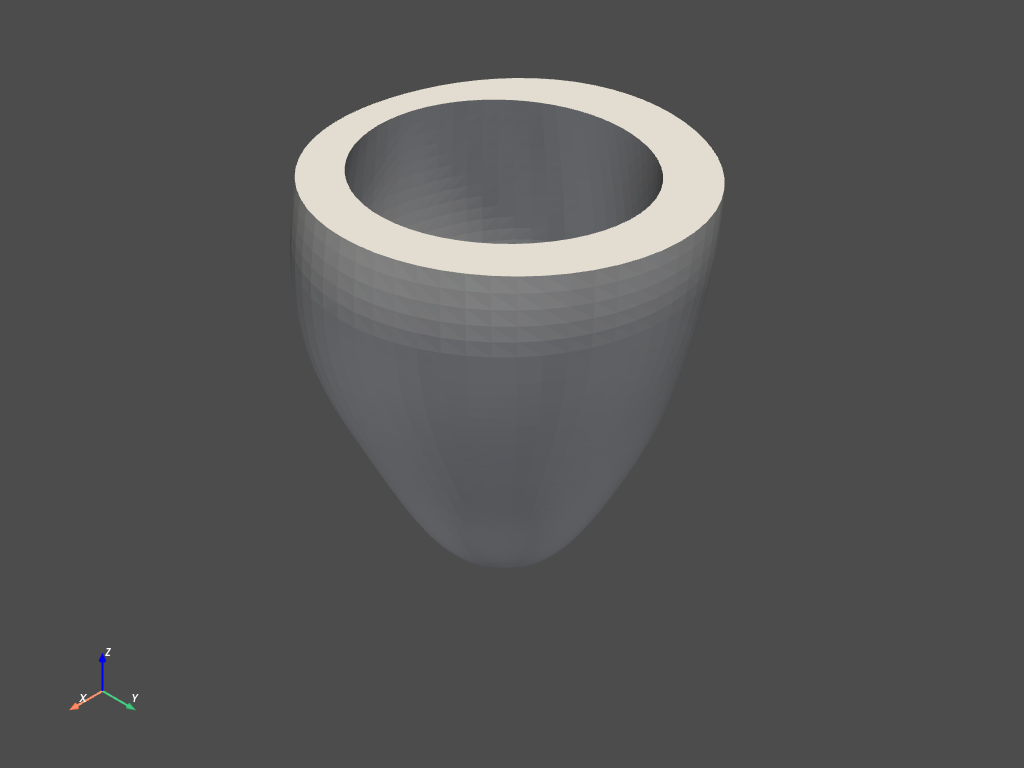

In [2]:
import pyvista as pv
filename = 'New_12.vtu'
mesh = pv.read(filename)
cpos = mesh.plot()